<a href="https://colab.research.google.com/github/ThitiwatJtrsn/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

### Generate Data 

In [5]:
from sklearn.datasets import make_blobs

In [6]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2,random_state=6)

### Explore data

In [7]:
X.shape

(500, 2)

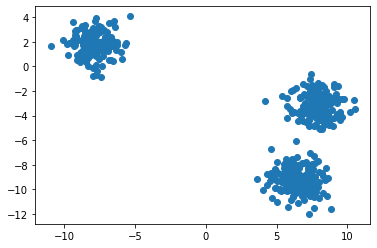

In [8]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

### Clustering

#### Import

In [9]:
from sklearn.cluster import KMeans

#### Define

In [10]:
kmeans = KMeans(n_clusters=2, random_state=6)

#### Fit-Predict

In [11]:
y_clust = kmeans.fit_predict(X)

In [12]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

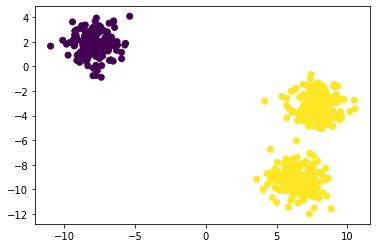

In [13]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

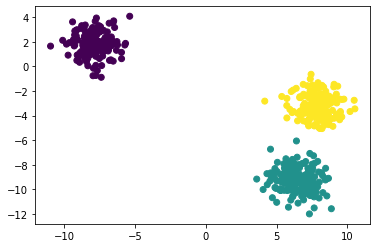

In [14]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

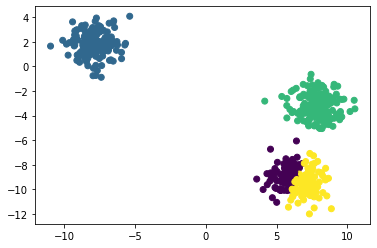

In [15]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

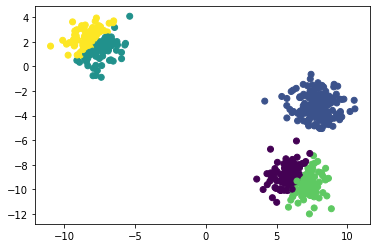

In [16]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

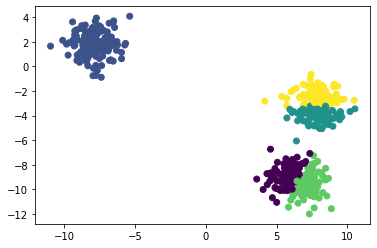

In [17]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

## Example Application (Color Quantization)

In [18]:
import cv2
import os

In [21]:
img = cv2.imread('/content/wpMnxQ.jpeg')

In [22]:
img.shape

(532, 800, 3)

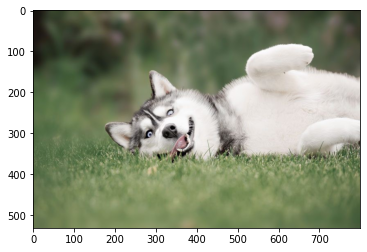

In [23]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

### นับจำนวนสี

In [24]:
import numpy as np

In [25]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(31280, 3)

### จัดกลุ่มสีให้เหลือ 16 สี

In [26]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [27]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(425600, 3)

In [28]:
final_color = myquantize.fit_predict(img_row)

### ใช้ centroid เป็นตัวแทนของสี

In [29]:
centroid = myquantize.cluster_centers_

In [30]:
centroid

array([[ 34.99332612,  36.26920996,  26.26244589],
       [111.70420999, 109.35984876,  95.25870719],
       [231.76580926, 226.46310941, 223.07983018],
       [108.25245902, 125.79087011,  83.22302648],
       [ 84.3925662 ,  97.37352335,  69.84736546],
       [146.75557029, 141.18527851, 131.40623342],
       [199.20610635, 193.18641509, 186.05173242],
       [ 54.74181478,  62.24080547,  44.19270346],
       [134.35201035, 148.43894307, 102.15463276],
       [ 94.85904323, 110.53056082,  77.01031391],
       [243.68615714, 241.25692143, 239.73826831],
       [217.83733744, 212.05316192, 207.22262484],
       [ 72.47470869,  82.56996428,  59.17421789],
       [174.52356751, 170.66756353, 157.91469856],
       [150.36706093, 161.86540725, 116.28308762],
       [121.74017303, 137.98331938,  92.01923531]])

แทนสีคืนลงไป

In [31]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

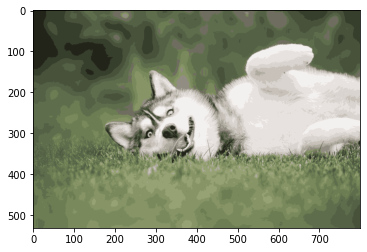

In [32]:
plt.imshow(new_img/255)

In [33]:
plt.imsave('img.jpg',new_img/255)

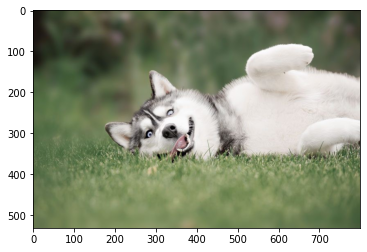

In [34]:
plt.imshow(RGB_img)

# Hierachical Clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# Clustering Evaluation

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation